In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b2757ba190a25a91cbcd609054a24af2c0fefca3a6589d4bb2c7597d1b426aee
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


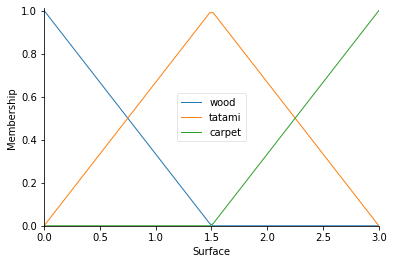

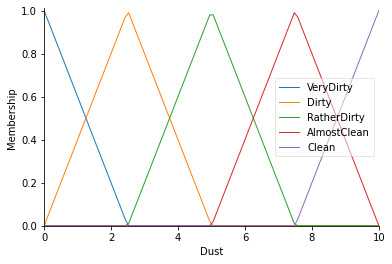

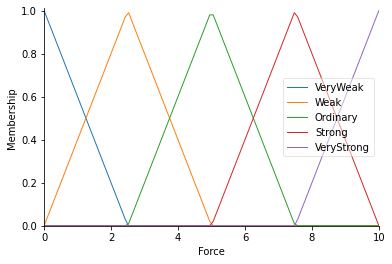

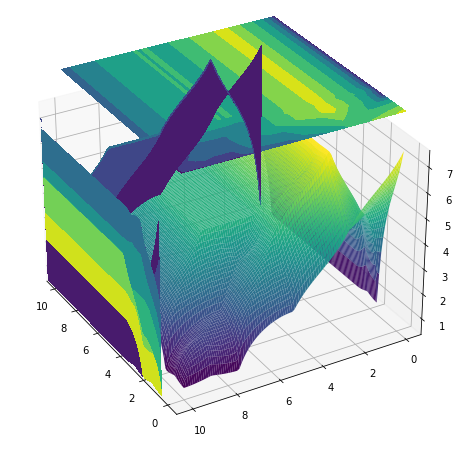

In [5]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_surface = np.linspace(0,3,100)
universe_dust = np.linspace(0,10,100)
universe_force = np.linspace(0,10,100)

surface = ctrl.Antecedent(universe_surface,'Surface')
dust = ctrl.Antecedent(universe_dust,'Dust')
force = ctrl.Consequent(universe_force,'Force')

name_surface = ['wood','tatami','carpet']
name_dust = ['VeryDirty','Dirty','RatherDirty','AlmostClean','Clean']
name_force = ['VeryWeak','Weak','Ordinary','Strong','VeryStrong']
surface.automf(names=name_surface)
dust.automf(names=name_dust)
force.automf(names=name_force)

surface.view()
dust.view()
force.view()

rule1 = ctrl.Rule(antecedent=((surface['wood']&(dust['Clean']|dust['AlmostClean']))|(surface['tatami']&dust['Clean'])),consequent=force['VeryWeak'])
rule2 = ctrl.Rule(antecedent=((surface['wood']&dust['RatherDirty'])|(surface['tatami']&dust['AlmostClean'])|(surface['carpet']&dust['Clean'])),consequent=force['Weak'])
rule3 = ctrl.Rule(antecedent=((surface['carpet']&(dust['AlmostClean']|dust['RatherDirty']))|(surface['tatami']&dust['RatherDirty'])|(surface['wood']&dust['Dirty'])),consequent=force['Ordinary'])
rule4 = ctrl.Rule(antecedent=((dust['Dirty']&(surface['tatami']|surface['carpet']))|(surface['wood']&dust['VeryDirty'])),consequent=force['Strong'])
rule5 = ctrl.Rule(antecedent=(dust['VeryDirty']&(surface['tatami']|surface['carpet'])),consequent=force['VeryWeak'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=100*100+1)
upsampled = np.linspace(0,10,100)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['Surface'] = x[i,j]
    sim.input['Dust'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Force']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,150)